# Happiness dataset

In [ ]:
# Loading the data and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

filepath = 'data/world_happiness.csv'
happy_raw = pd.read_csv(filepath)

print(happy_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       143 non-null    int64  
 1   country          143 non-null    object 
 2   social_support   142 non-null    float64
 3   freedom          142 non-null    float64
 4   corruption       135 non-null    float64
 5   generosity       142 non-null    float64
 6   gdp_per_cap      143 non-null    int64  
 7   life_exp         143 non-null    float64
 8   happiness_score  143 non-null    int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 10.2+ KB
None


## Distributions

## Cleaning

In [2]:
# Cleaning
def clean_data(happy):
    happy = happy.dropna()
    happy = happy.drop('Unnamed: 0', axis=1)
    return happy

happy = clean_data(happy_raw.copy())
happy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135 entries, 0 to 142
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          135 non-null    object 
 1   social_support   135 non-null    float64
 2   freedom          135 non-null    float64
 3   corruption       135 non-null    float64
 4   generosity       135 non-null    float64
 5   gdp_per_cap      135 non-null    int64  
 6   life_exp         135 non-null    float64
 7   happiness_score  135 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 9.5+ KB


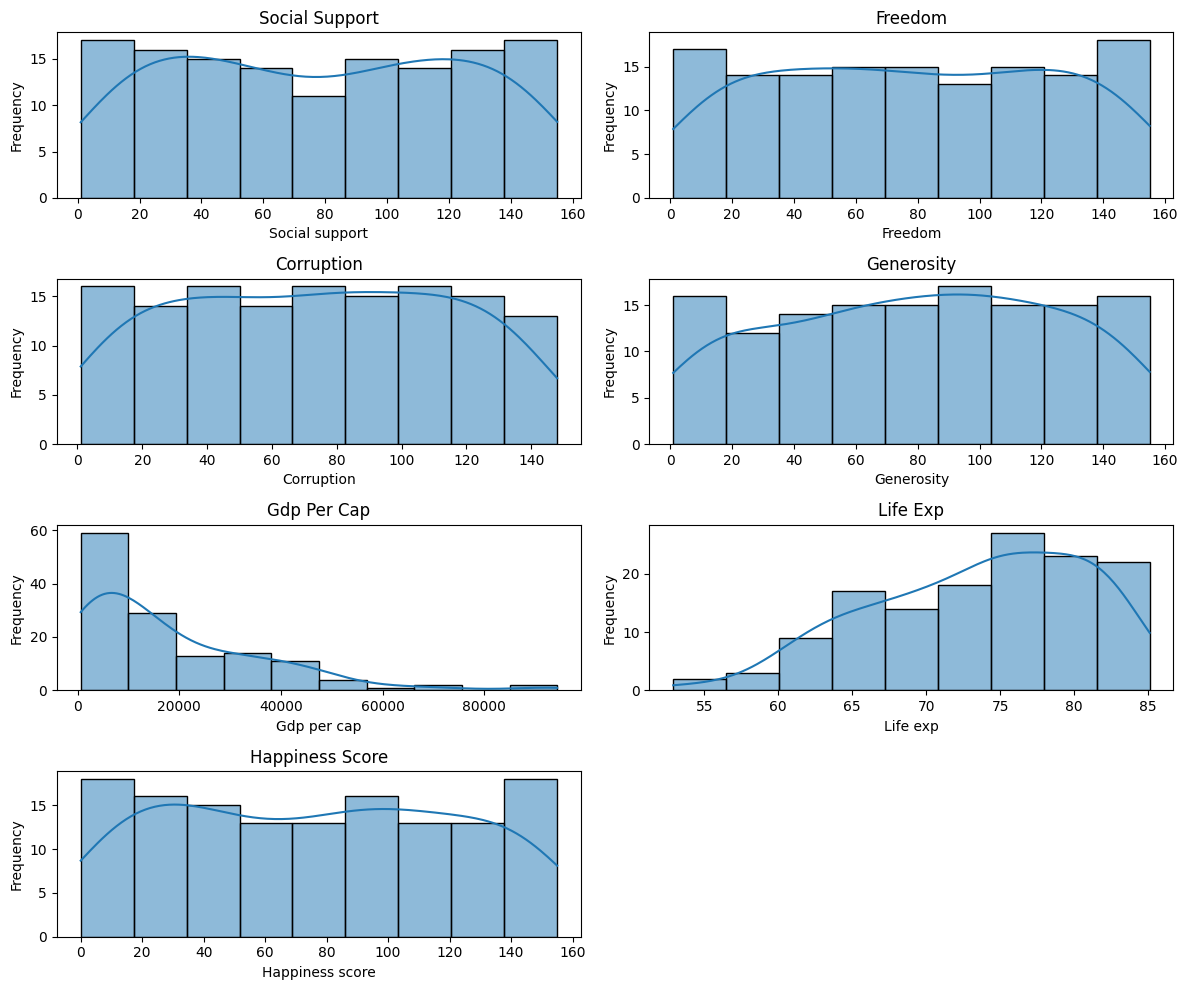

In [3]:
# Distributions of numerical variables

# Define column names
cols = ['social_support', 'freedom', 'corruption', 'generosity', 'gdp_per_cap', 'life_exp', 'happiness_score']

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 10))
axes = axes.flatten()

# Plot histograms with KDE
for i, col in enumerate(cols):
  sns.histplot(data=happy, x=col, kde=True, ax=axes[i])
  axes[i].set_title(col.replace('_', ' ').title())
  axes[i].set_xlabel(col.replace('_', ' ').capitalize())
  axes[i].set_ylabel('Frequency')

# Hide any unused subplot: the last one
if len(cols) < len(axes):
  fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

In [4]:
happy.head()

,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
0,Finland,2.0,5.0,4.0,47.0,42400,81.8,155
1,Denmark,4.0,6.0,3.0,22.0,48300,81.0,154
2,Norway,3.0,3.0,8.0,11.0,66300,82.6,153
3,Iceland,1.0,7.0,45.0,3.0,47900,83.0,152
4,Netherlands,15.0,19.0,12.0,7.0,50500,81.8,151


## Correlations

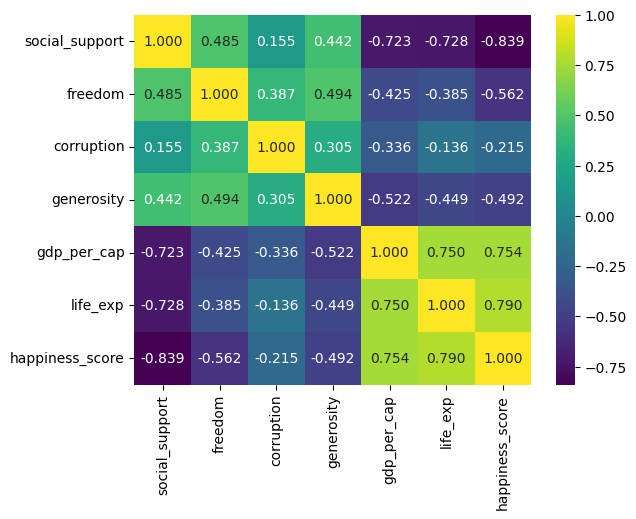

In [5]:
# Correlations
sns.heatmap(happy.drop('country', axis=1).corr(), fmt='.3f', annot=True, cmap='viridis')
plt.show()

## Looking for determinants
The three attributes that have high correlations with the variable of interest —happiness score— are social support (-0.839), life expectancy (0.790) and GDP per capita (0.754). In this section, I fitted regressions for each attribute as explanatory variables of the happiness score.

### Regression: Happiness Score vs. Social Support
This analysis investigates the relationship between social support and happiness score, using simple linear regression to quantify how strongly one predicts the other across nations.

- Social support reflects the national average of responses to a question about the availability of reliable help during times of need.

- Happiness score serves as a composite index of subjective well-being derived from multiple socio-economic indicators.

**Key statistics:**

- Correlation coefficient: –0.839

- R² score: Very high (0.705), indicating strong explanatory power.

- P-value: Significantly low, supporting statistical relevance.

A scatter plot with the fitted regression line visually confirms the negative relationship—suggesting that as social support increases, happiness score tends to rise proportionally. The residual plot further validates the fit, showing limited dispersion and no major violation of linearity assumptions.

This regression sets the foundation for broader multi-variable models by validating social support as a core determinant of well-being.

Correlation coefficient: -0.839
Slope: -0.8469
Intercept: 142.30
R-squared: 0.705
P-value: 4.9671e-37


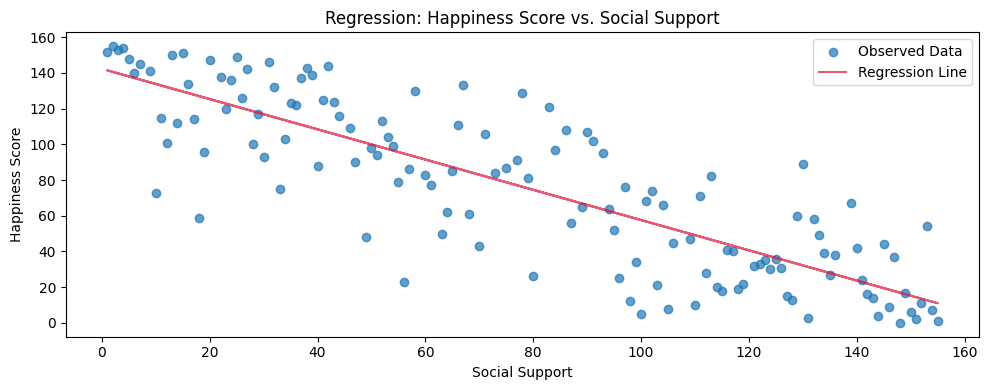

In [6]:
# Regression: Happiness Score vs. Social Support

# Predictor and response
x = happy['social_support']
y = happy['happiness_score']

# Fit regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Print regression results and correlation
print('Correlation coefficient: {:.3f}'.format(x.corr(y)))
print(f'Slope: {slope:.4f}')
print(f'Intercept: {intercept:.2f}')
print(f'R-squared: {r_value**2:.3f}')
print(f'P-value: {p_value:.4e}')

# Regression line for plotting
reg_line = intercept + slope * x

# Plot
plt.figure(figsize=(10, 4))
plt.title('Regression: Happiness Score vs. Social Support')
plt.scatter(x, y, alpha=0.7, label='Observed Data')
plt.plot(x, reg_line, color='crimson', alpha=0.7, label='Regression Line')
plt.xlabel('Social Support')
plt.ylabel('Happiness Score')
plt.legend()
plt.tight_layout()
plt.show()

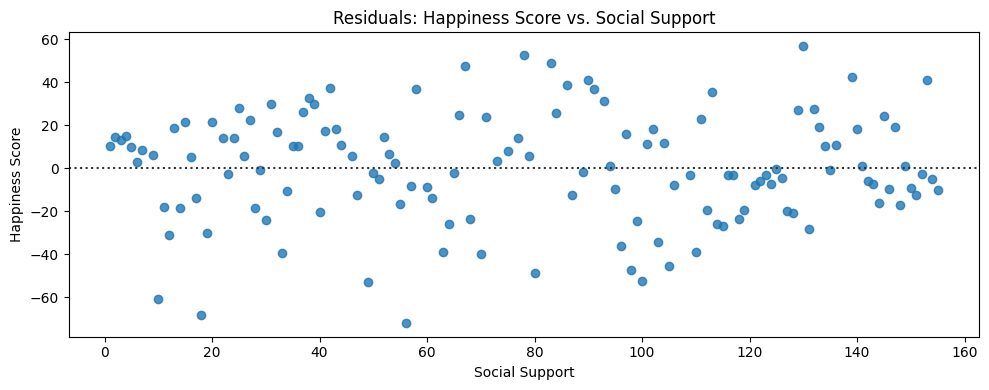

In [7]:
# Resid plot: Happiness Score vs. Social Support
plt.figure(figsize=(10, 4))
sns.residplot(x='social_support', y='happiness_score', data=happy)
plt.title('Residuals: Happiness Score vs. Social Support')
plt.xlabel('Social Support')
plt.ylabel('Happiness Score')
plt.tight_layout()
plt.show()

### Regression: Happiness Score vs. Life Expectancy
This regression evaluates the relationship between life expectancy and the happiness score, using a simple linear model to estimate how longevity influences national well-being.

- Life expectancy represents the average number of years a person is expected to live at birth, serving as a proxy for healthcare, stability, and overall quality of life.

- Happiness score measures subjective well-being across countries and is influenced by several socio-economic factors.

**Key metrics:**

- Correlation coefficient: 0.790, indicating a strong positive relationship.

- R² score: High (0.625), suggesting that life expectancy explains a substantial portion of the variance in happiness.

- P-value: Very low, confirming statistical significance.

A scatter plot with the regression line shows that countries with longer life expectancy generally report higher happiness scores. The residual plot displays moderate dispersion but no major violations of model assumptions, supporting the appropriateness of a linear fit.

This result reinforces life expectancy as a reliable predictor of national happiness.

Correlation coefficient: 0.790
Slope: 5.1587
Intercept: -303.19
R-squared: 0.625
P-value: 4.3243e-30


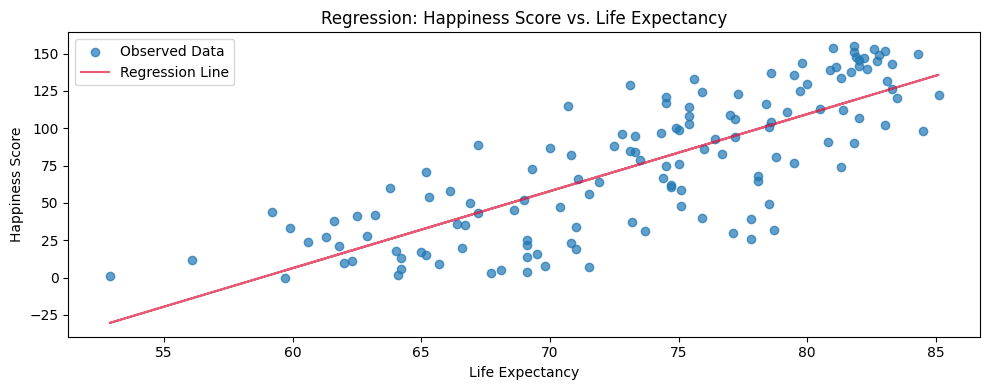

In [8]:
# Regression: Happiness Score vs. Life Expectancy

# Predictor and response
x = happy['life_exp']
y = happy['happiness_score']

# Fit regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Print regression results and correlation
print('Correlation coefficient: {:.3f}'.format(x.corr(y)))
print(f'Slope: {slope:.4f}')
print(f'Intercept: {intercept:.2f}')
print(f'R-squared: {r_value**2:.3f}')
print(f'P-value: {p_value:.4e}')

# Regression line for plotting
reg_line = intercept + slope * x

# Plot
plt.figure(figsize=(10, 4))
plt.title('Regression: Happiness Score vs. Life Expectancy')
plt.scatter(x, y, alpha=0.7, label='Observed Data')
plt.plot(x, reg_line, color='crimson', alpha=0.7, label='Regression Line')
plt.xlabel('Life Expectancy')
plt.ylabel('Happiness Score')
plt.legend()
plt.tight_layout()
plt.show()

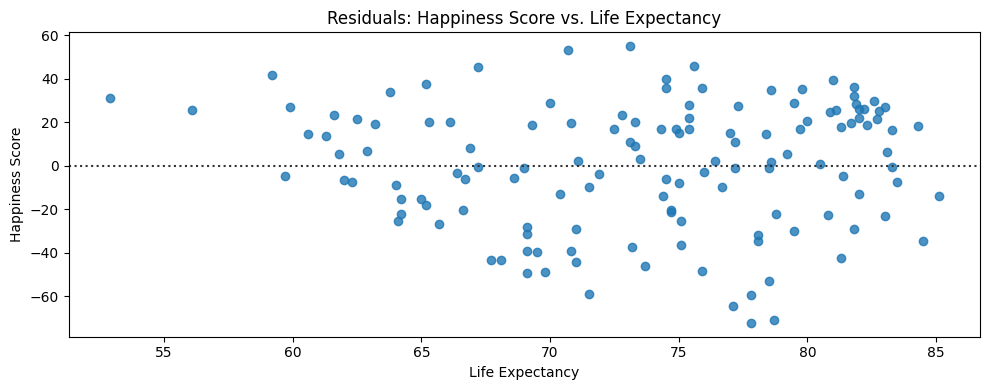

In [9]:
# Resid plot: Happiness Score vs. Life Expectancy
plt.figure(figsize=(10, 4))
sns.residplot(x='life_exp', y='happiness_score', data=happy)
plt.title('Residuals: Happiness Score vs. Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Happiness Score')
plt.tight_layout()
plt.show()

### Regression: Happiness Score vs. GDP per Capita
This analysis explores the relationship between GDP per capita and the happiness score, using linear regression to assess how national wealth influences well-being.

- GDP per capita reflects the average economic output per person and is a standard indicator of national wealth.

- Happiness score serves as a composite metric of subjective well-being across countries.

**Initial regression results:**

- Correlation coefficient: 0.754

- R² score: Moderate (0.568), indicating some explanatory power.

- P-value: Statistically significant.

However, both the scatter and residual plots suggest that a linear model may not capture the true relationship. The data appears nonlinear, with diminishing returns —countries with high GDP per capita do not show proportionally higher happiness scores.

Correlation coefficient: 0.754
Slope: 0.0019
Intercept: 40.91
R-squared: 0.568
P-value: 5.4186e-26


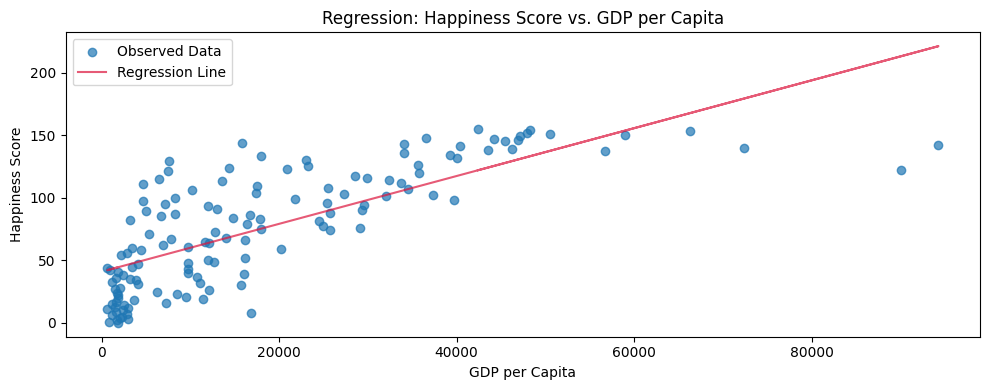

In [10]:
# Regression: Happiness Score vs. GDP per Capita

# Predictor and response
x = happy['gdp_per_cap']
y = happy['happiness_score']

# Fit regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Print regression results and correlation
print('Correlation coefficient: {:.3f}'.format(x.corr(y)))
print(f'Slope: {slope:.4f}')
print(f'Intercept: {intercept:.2f}')
print(f'R-squared: {r_value**2:.3f}')
print(f'P-value: {p_value:.4e}')

# Regression line for plotting
reg_line = intercept + slope * x

# Plot
plt.figure(figsize=(10, 4))
plt.title('Regression: Happiness Score vs. GDP per Capita')
plt.scatter(x, y, alpha=0.7, label='Observed Data')
plt.plot(x, reg_line, color='crimson', alpha=0.7, label='Regression Line')
plt.xlabel('GDP per Capita' )
plt.ylabel('Happiness Score')
plt.legend()
plt.tight_layout()
plt.show()

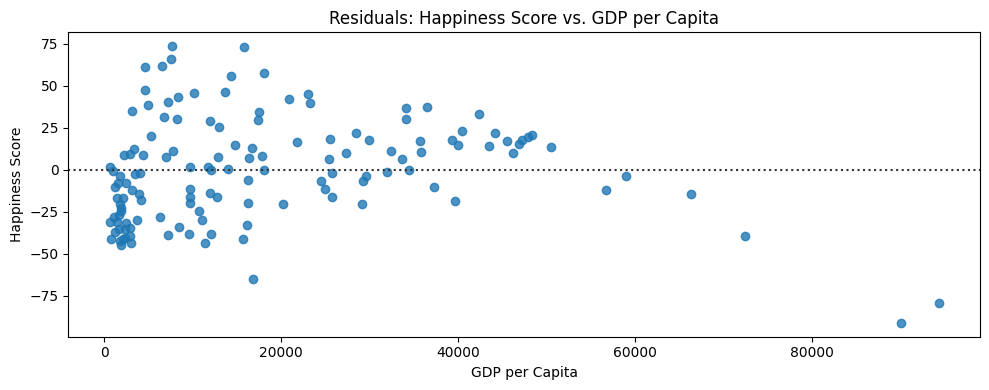

In [11]:
# Resid plot: Happiness Score vs. GDP per Capita
plt.figure(figsize=(10, 4))
sns.residplot(x='gdp_per_cap', y='happiness_score', data=happy)
plt.title('Residuals: Happiness Score vs. GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.tight_layout()
plt.show()

### Regression: Happiness Score vs. Log GDP per Capita
This analysis revisits the relationship between GDP per capita and the happiness score, applying a logarithmic transformation to address the nonlinear structure observed in the initial regression.

- GDP per capita reflects national affluence but shows a nonlinear association with happiness—indicating diminishing returns as income rises.

- A log transformation was applied to smooth out this curvature and improve model alignment with real-world behavior.

**Updated Regression Results**

- Correlation coefficient: 0.801 (↑ from 0.754).

- R² score: 0.642 (↑ from 0.568).

- P-value: Extremely low, maintaining statistical significance.

The scatter plot now displays a more linear trend, and the residuals show less heteroscedasticity, confirming that the transformation better captures the relationship between wealth and happiness. The increase in both correlation and R² validates this approach.

Correlation coefficient: 0.801
Slope: 30.8083
Intercept: -208.29
R-squared: 0.642
P-value: 1.7372e-31


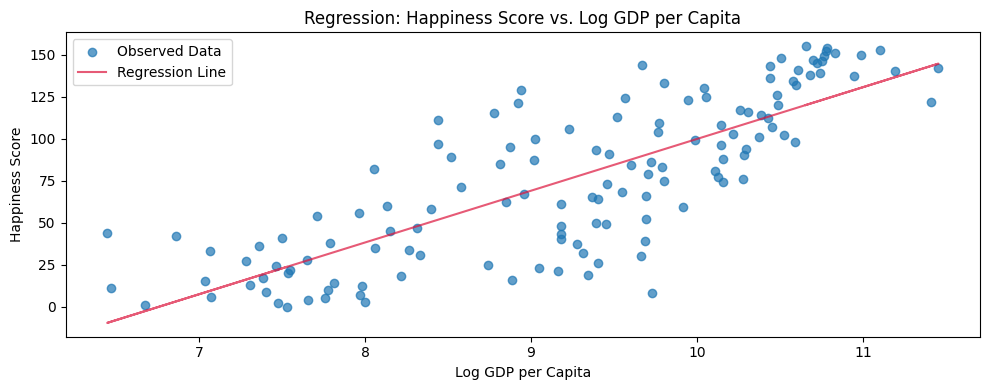

In [12]:
# Log transformation of the GDP per capita
happy['log_gdp'] = np.log(happy['gdp_per_cap'])

# Run the regression with the modified explanatory variable
# Predictor and response
x = happy['log_gdp']
y = happy['happiness_score']

# Fit regression
slope, intercept, r_value, p_value, _ = linregress(x, y)

# Print regression results and correlation
print('Correlation coefficient: {:.3f}'.format(x.corr(y)))
print(f'Slope: {slope:.4f}')
print(f'Intercept: {intercept:.2f}')
print(f'R-squared: {r_value**2:.3f}')
print(f'P-value: {p_value:.4e}')

# Regression line for plotting
reg_line = intercept + slope * x

# Plot
plt.figure(figsize=(10, 4))
plt.title('Regression: Happiness Score vs. Log GDP per Capita')
plt.scatter(x, y, alpha=0.7, label='Observed Data')
plt.plot(x, reg_line, color='crimson', alpha=0.7, label='Regression Line')
plt.xlabel('Log GDP per Capita' )
plt.ylabel('Happiness Score')
plt.legend()
plt.tight_layout()
plt.show()

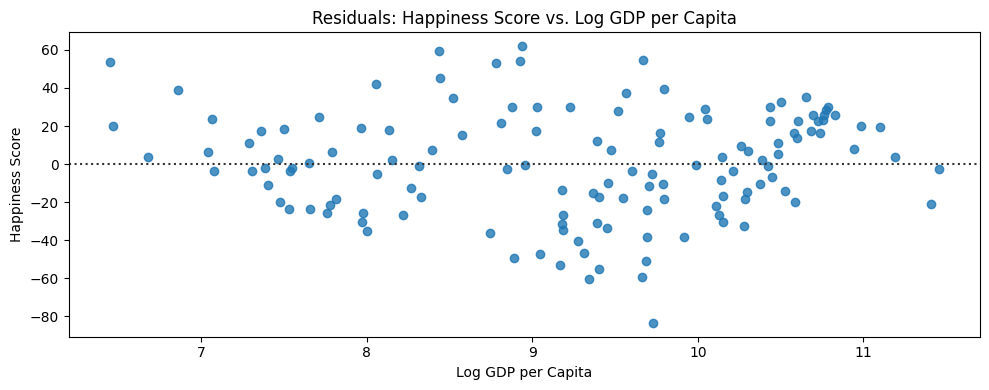

In [13]:
# Resid plot: Happiness Score vs. Log GDP per Capita
plt.figure(figsize=(10, 4))
sns.residplot(x='log_gdp', y='happiness_score', data=happy)
plt.title('Residuals: Happiness Score vs. Log GDP per Capita')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.tight_layout()
plt.show()

# Regressions with Scikit-learn

## Regression using top correlated features

This model explores how well social support (ρ = –0.839), Log GDP per capita (ρ = 0.801), and life expectancy (ρ = 0.790) —the three features most strongly correlated with happiness— can explain variation in the happiness score. By selecting these predictors based on their correlation strength, the regression captures core socio-economic dimensions influencing subjective well-being. The approach balances simplicity with interpretability, aiming to establish a baseline for predictive performance using features that carry strong predictive power or statistical relevance with respect to the target variable.

The initial performance for this model, measured with the r-squared value, is 0.7643.

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error

# Features and target
X = happy[['social_support', 'log_gdp', 'life_exp']]
y = happy['happiness_score']

# train/test splits
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42
)

# Model instantiation and fitting
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and model performance
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = root_mean_squared_error(y_test, predictions)

print(f'r2 score: {r2:.4f}')
print(f'MAE: : {mae:.4f}')
print(f'RMSE: : {rmse:.4f}')

r2 score: 0.7643
MAE: : 17.9627
RMSE: : 23.1687


This plot visualizes the residuals from a linear regression model fitted with the top three correlated predictors of happiness:

- `social_support`

- `log_gdp`

- `life_exp`

Each point represents the difference between the actual and predicted happiness score for a specific country, plotted against the predicted value.

**Interpretation:**

- The residuals appear evenly scattered around the horizontal line at zero, with no clear curvature or funnel shape.

- This suggests the model does not exhibit strong nonlinearity or heteroscedasticity.

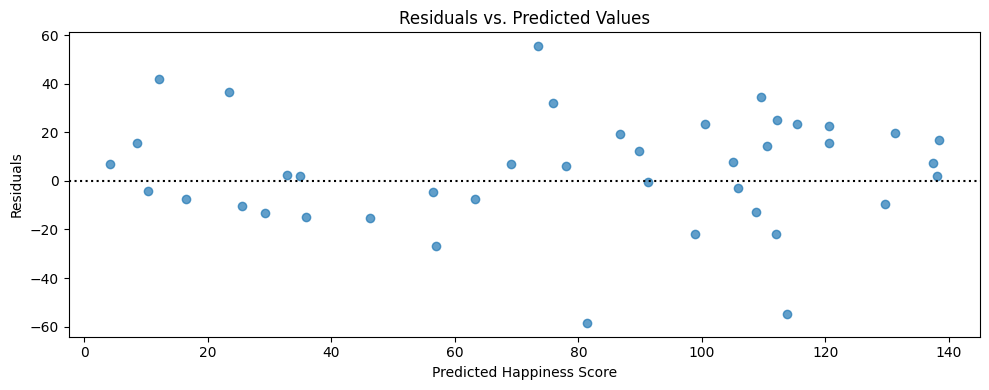

In [15]:
# Resid plot for multi-feature regression
# Residuals
residuals = y_test - predictions

# Simple scatter plot of residuals vs. predicted values
plt.figure(figsize=(10, 4))
plt.scatter(predictions, residuals, alpha=0.7)
plt.axhline(0, color='black', linestyle=':')
plt.xlabel('Predicted Happiness Score')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.tight_layout()
plt.show()

## Lasso regression for feature importance
This approach applies Lasso regression, a linear model with built-in regularization, to identify which attributes most strongly influence happiness scores. By penalizing less informative features and shrinking their coefficients toward zero, Lasso serves as both a predictive model and a feature selection tool —useful when prioritizing interpretability and reducing dimensionality.

After scaling the input data, the model revealed that social support and life expectancy had a great impact, and also that freedom had even more importance than the logarithmic GDP per capita. These attributes show non-zero coefficients, underscoring their value in explaining happiness across nations. The resulting feature subset was then used to re-fit a standard linear regression, which produced enhanced performance (R² = 0.8026), validating the utility of Lasso-guided selection.

Social Support: -21.1068
Freedom: -7.0638
Corruption: -0.3134
Generosity: -1.6297
Life Exp: 13.8158
Log Gdp: 3.5333


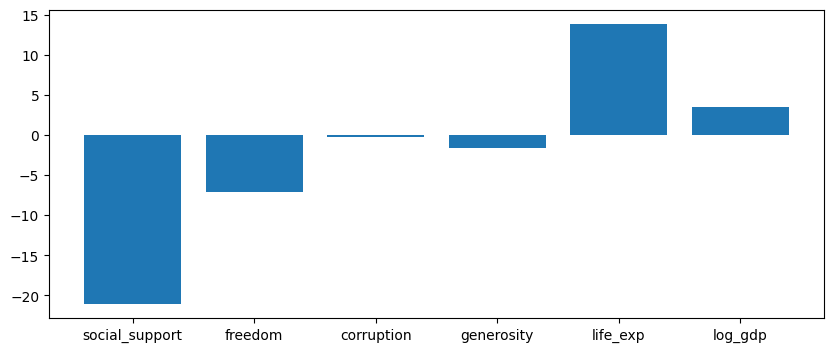

In [16]:
# Scale the data and run a Lasso regression on the entire dataset
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

# Features and target
X = happy.drop(['country', 'happiness_score', 'gdp_per_cap'], axis=1)
y = happy['happiness_score']

# train/test splits
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42
)

# Fit the scaler to the training data
scaler = StandardScaler()
scaler.fit(X_train)

# Use the fitted scaler to transform both feature sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert it back to dataframes for readability and consistency
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

### Running the Lasso model ###

# Model instantiation and fitting
model = Lasso(alpha=0.3)
model.fit(X_train_scaled, y_train)

# Compute and print the coefficients
lasso_coef = model.fit(X_train_scaled, y_train).coef_
for feature, coef in zip(X.columns, lasso_coef):
  print(f'{feature.replace("_", " ").title()}: {coef:.4f}')
plt.figure(figsize=(10, 4))
plt.bar(X.columns, lasso_coef)
plt.show()

This plot visualizes the residuals of a linear regression model constructed using features selected via Lasso coefficients, specifically:

- `social_support`

- `log_gdp`

- `life_exp`

- `freedom`

After scaling and model refinement, the regression showed enhanced performance (R² = 0.8026) and was verified through cross-validation, with results falling within a 99% confidence level.

**Interpretation:**

- The residuals appear uniformly scattered around the horizontal baseline, with no pronounced funnel shapes or curvature.

- This distribution indicates that the model errors are approximately homoscedastic, meaning error variance remains fairly constant across predicted values.

- The absence of clear outliers or clustering patterns suggests a stable and well-calibrated fit, confirming that the selected features contribute meaningfully to the predictive structure.

In [17]:
# Run the regression again including one more feature: freedom

# Features and target
X = happy[['social_support', 'log_gdp', 'life_exp', 'freedom']]
y = happy['happiness_score']

# train/test splits
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42
)

# Model instantiation and fitting
model_subset = LinearRegression()
model_subset.fit(X_train, y_train)

# Predictions and model performance
predictions = model_subset.predict(X_test)
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = root_mean_squared_error(y_test, predictions)

print(f'r2 score: {r2:.4f}')
print(f'MAE: : {mae:.4f}')
print(f'RMSE: : {rmse:.4f}')

r2 score: 0.8026
MAE: : 16.9595
RMSE: : 21.2017


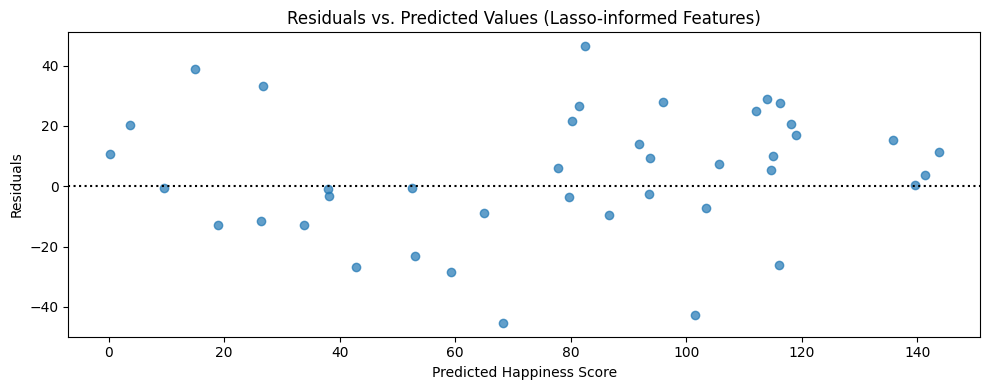

In [18]:
# Residuals
residuals = y_test - predictions

# Simple scatter plot of residuals vs. predicted values
plt.figure(figsize=(10, 4))
plt.scatter(predictions, residuals, alpha=0.7)
plt.axhline(0, color='black', linestyle=':')
plt.xlabel('Predicted Happiness Score')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values (Lasso-informed Features)')
plt.tight_layout()
plt.show()

In [19]:
# Cross validation
from sklearn.model_selection import cross_val_score, KFold

# Create a KFold object
kf = KFold(n_splits=10, shuffle=True, random_state=42)
model_subset = LinearRegression()

# Compute 10-fold cross-validation scores
cv_scores_subset = cross_val_score(model_subset, X, y, cv=kf)

# Print scores
print(f'99% Confidence Level: {np.quantile(cv_scores_subset, [0.01, 0.99])}')

99% Confidence Level: [0.51741731 0.85939118]


### Why Scaling Matters in Lasso Regression
Scaling is an essential preprocessing step when applying Lasso regression, because the model relies on regularization that penalizes coefficients based on their magnitude. Without standardizing the input features, variables measured in larger units (like GDP per capita) can dominate the penalty purely due to their scale —not necessarily due to stronger influence on the target.

By applying standard scaling, each feature is transformed to have a mean of 0 and a standard deviation of 1, ensuring that Lasso treats all variables equally when deciding which ones to shrink or retain. This makes the coefficient comparison fair and prevents biased selection, ultimately producing a more balanced and interpretable model.

## Regression with all the features
To assess whether additional features improve model performance, I fitted a linear regression using the full feature set. However, this model yielded a slightly lower R² compared to the Lasso-informed subset. The drop in performance highlights how including irrelevant or redundant variables can damage generalizability, even in a well-calibrated pipeline.

The Lasso-based feature selection produced a simpler model with stronger predictive accuracy, underscoring the importance of interpretability and dimensional control. While the full model offers completeness, the regularized approach better reflects the underlying structure of the happiness score.

In [20]:
# Run the regression with all the features

# Features and target
X = happy.drop(['country', 'happiness_score', 'gdp_per_cap'], axis=1)
y = happy['happiness_score']

# train/test splits
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42
)

# Model instantiation and fitting
model_complete = LinearRegression()
model_complete.fit(X_train, y_train)

# Predictions and model performance
predictions = model_complete.predict(X_test)
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = root_mean_squared_error(y_test, predictions)

print(f'r2 score: {r2:.4f}')
print(f'MAE: : {mae:.4f}')
print(f'RMSE: : {rmse:.4f}')

r2 score: 0.8022
MAE: : 17.1061
RMSE: : 21.2224


In [21]:
# Cross validation

# Create a KFold object
kf = KFold(n_splits=10, shuffle=True, random_state=42)
model_complete = LinearRegression()

# Compute 10-fold cross-validation scores
cv_scores_complete = cross_val_score(model_complete, X, y, cv=kf)

# Print scores
print(f'99% Confidence Level: {np.quantile(cv_scores_complete, [0.01, 0.99])}')

99% Confidence Level: [0.52150063 0.84695036]


## Decision tree regressor
The tree’s performance reflects a moderate ability to capture complex relationships between variables and happiness scores. This approach avoids the assumption of linearity, providing a contrast in modeling philosophy compared to earlier regressions.

No feature scaling was necessary, and the selected attributes remained relevant in guiding split logic.

**Model Performance (depth = 3)**

- R² score: 0.7385

- Mean Absolute Error (MAE): 19.3881

- Root Mean Squared Error (RMSE): 24.4054

In [22]:
from sklearn.tree import DecisionTreeRegressor

# Select features and target
X = happy[['social_support', 'log_gdp', 'life_exp', 'freedom']]  # or use the full set
y = happy['happiness_score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate and fit the model
model = DecisionTreeRegressor(max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Predictions and performance
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = root_mean_squared_error(y_test, predictions)

# Print results
print(f"r2 score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

r2 score: 0.7385
MAE: 19.3881
RMSE: 24.4054


## Random forest regressor
This ensemble method combines multiple decision trees to improve accuracy and reduce variance. The R² score indicates strong explanatory power, comparable to the best-performing linear model (R² score: 0.8026). The MAE and RMSE metrics show relatively low prediction error, highlighting robust generalization across test data.

**Model performance (n_estimators=100, depth=5)**
- R² score: 0.7941

- Mean Absolute Error (MAE): 16.9633

- Root Mean Squared Error (RMSE): 21.6523

In [23]:
from sklearn.ensemble import RandomForestRegressor

# Features and target
X = happy[['social_support', 'log_gdp', 'life_exp', 'freedom']]
y = happy['happiness_score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate and fit the model
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = root_mean_squared_error(y_test, predictions)

# Output results
print(f"r2 Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

r2 Score: 0.7941
MAE: 16.9633
RMSE: 21.6523


## Model comparison
The Random Forest Regressor is the best performer based on cross-validation. Its narrow spread and high median in the boxplot signal strong generalization and reliability.

**Boxplot interpretation**

- Random Forest Regressor shows higher median R² and tighter whiskers, indicating stronger and more consistent performance.

- Decision Tree has wider whiskers and a lower median, suggesting more variability and weaker generalization.

- Linear Regression sits between the two —stable but with a slightly lower median than the forest. It also shows a tendency to produce some low scores.

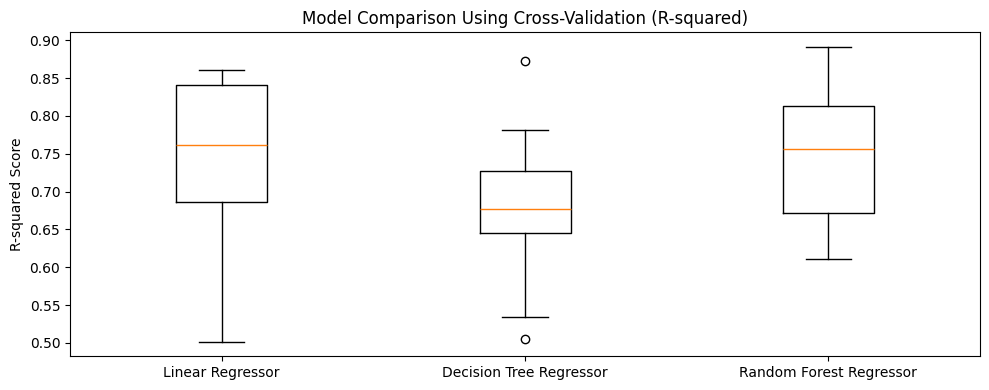

In [25]:
# Model comparison

# Features and target (Lasso-informed)
X = happy[['social_support', 'log_gdp', 'life_exp', 'freedom']]
y = happy['happiness_score']

# Models
models = {
    'Linear Regressor': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(max_depth=3, random_state=42),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
}

# Dictionary to store the scores
scores = {}

# 10-split KFold object
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Cross-validation
for name, model in models.items():
  cv_score = cross_val_score(model, X, y, cv=kf)
  scores[name] = cv_score

# Boxplot of the results
plt.figure(figsize=(10, 4))
plt.boxplot(scores.values(), tick_labels=scores.keys())
plt.title('Model Comparison Using Cross-Validation (R-squared)')
plt.ylabel('R-squared Score')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

The KDE curves reveal how each model performs across multiple folds of cross-validation:

- Random Forest Regressor: Shows a high and narrow peak, indicating consistently strong R² scores with low variance. This reflects high generalization and model reliability.

- Linear Regression: Displays a moderately tall curve with slightly broader spread, suggesting stable performance but less consistent than the forest.

- Decision Tree Regressor: Has the widest and flattest distribution, signaling greater variability and more frequent lower scores—indicating less robust generalization.

Together with the boxplot, the KDE visualization confirms that Random Forest offers the most dependable performance, while the tree model shows sensitivity across folds.

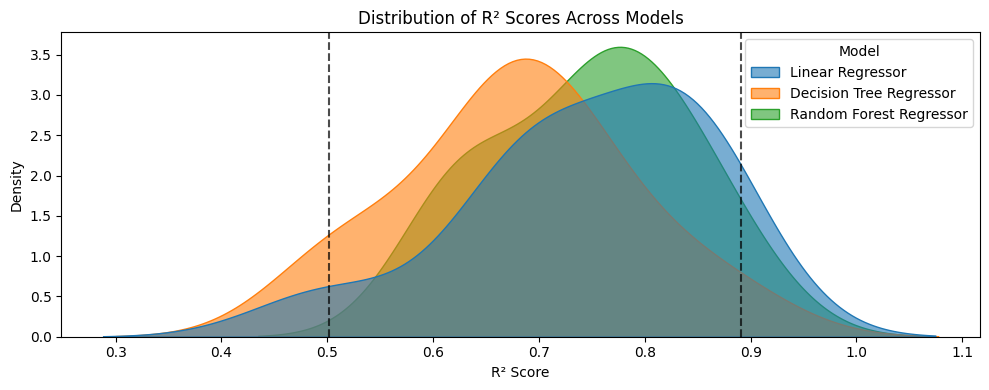

In [34]:
# KDE Plot of R² Distributions Across Models

# Convert dictionary of scores to DataFrame for plotting
scores_df = pd.DataFrame(scores)

# Melt the DataFrame for Seaborn compatibility
scores_melted = scores_df.melt(var_name='Model', value_name='R² Score')

# Plot KDEs
plt.figure(figsize=(10, 4))
sns.kdeplot(data=scores_melted, x='R² Score', hue='Model', fill=True, common_norm=False, alpha=0.6)
plt.title('Distribution of R² Scores Across Models')
plt.xlabel('R² Score')

# Min/max scores
r2_min = min(scores_melted['R² Score'])
r2_max = max(scores_melted['R² Score'])

for value in [r2_min, r2_max]:
    plt.axvline(x=value, color='black', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Note on KDE Plot Ranges for R² Scores

The KDE plot shows R² score distributions across models. While actual R² values range between –∞ and 1 (typically 0 and 1), the KDE curve may extend slightly beyond these bounds due to **kernel smoothing**:

- `seaborn.kdeplot()` estimates density with a bandwidth that can **project density outside observed min/max values**.
- This can result in visually misleading extensions beyond the valid R² range (e.g., values > 1 or < minimum).

**To resolve:**
- Use `plt.xlim(min, max)` to constrain the x-axis.
- Consider a histogram (`sns.histplot()`) for sharper bounds and interpretability.

This ensures the plot reflects the score distribution without suggesting physically impossible values.
